***This note book contains*** 

- 1: Heat maps
- 2: Area charts
- 3: correlations 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
scaler =  StandardScaler()

### Custom data generation 

In [5]:
data = pd.read_csv("MLTempDataset1.csv")
time_format = "%Y-%m-%d %H:%M:%S"
times_temp  = (data['Datetime'] , data['Hourly_Temp'])
temp = times_temp[1]
time = times_temp[0]
def average_calculator(temp ,times,current_month = 1):
    """
    Calculates the average temperatures ie 
    monthly temperatures 
    morning hours temps
    afternoon hours temps
    evening hours temps
    """
    count = 0
    sum_temp = 0
    total_sum = 0
    morning_temp = 0
    afternoon_temp = 0
    evening_temp = 0
    no_morning = 0
    no_afternoon = 0
    no_evening = 0
    for i , item in enumerate(temp):
        month = time[i].split('-')[1]
        ## extracting the hours
        time_hr = (time[i].split(' ')[1]).split(':')[0]
        current_temp = temp[i]
        if int(month) == current_month:
            current_month_s = time[i].split(' ')[0]
            sum_temp +=current_temp
            count = count +1
            time_hr = int(time_hr)
            
            ## Morning hours
            if time_hr >= 6 and time_hr <12:
                morning_temp +=current_temp
                no_morning +=1
    
            ## afternoon hrs
            elif time_hr >= 12 and time_hr <= 18:
                afternoon_temp += current_temp
                no_afternoon +=1
             
            ## evening hrs
            elif time_hr >= 19 and time_hr <= 21:
                evening_temp += current_temp
                no_evening+=1
            
            # night
            else :
                pass
        else:
                pass
            
    return (current_month_s ,
            sum_temp/count , # Monthly average
            morning_temp/no_morning , # Morning averages
            afternoon_temp/no_afternoon, # After noon averages
            evening_temp /no_evening) # Evvening averages
  
final_data = []
for i in range(10):
    monthly_values =average_calculator(temp ,time, current_month = (i+1))
    final_data.append(monthly_values)

data_dict = {
    'Month': [], 
    'Morning Avg': [],  
    'Afternoon Avg': [],
    'Evening Avg': [],
    'Monthly Avg': []
}

for month_number, monthly_avg, morning_avg, afternoon_avg, evening_avg in final_data:
        data_dict["Month"].append(month_number)
        data_dict["Morning Avg"].append(morning_avg)
        data_dict["Afternoon Avg"].append(afternoon_avg)
        data_dict["Evening Avg"].append(evening_avg)
        data_dict["Monthly Avg"].append(monthly_avg)
 
## creating a pd dataframe 
# Create a DataFrame from the data dictionary
df = pd.DataFrame(data_dict)

## converting the  month columns to abbreviations 
df['Month'] = pd.to_datetime(df['Month'])
df['Month'] = df['Month'].dt.strftime('%Y-%B')



##  HEAT MAPS

In [6]:


for month_number, monthly_avg, morning_avg, afternoon_avg, evening_avg in final_data:
    print(f"Month {month_number}:")
    print(f"   Monthly Average: {monthly_avg:.2f}")
    print(f"   Morning Average: {morning_avg:.2f}")
    print(f"   Afternoon Average: {afternoon_avg:.2f}")
    print(f"   Evening Average: {evening_avg:.2f}")
    

Month 2022-01-31:
   Monthly Average: 18.50
   Morning Average: 16.93
   Afternoon Average: 16.97
   Evening Average: 18.88
Month 2022-02-28:
   Monthly Average: 20.17
   Morning Average: 18.92
   Afternoon Average: 20.68
   Evening Average: 20.20
Month 2022-03-31:
   Monthly Average: 24.19
   Morning Average: 22.16
   Afternoon Average: 25.84
   Evening Average: 24.98
Month 2022-04-30:
   Monthly Average: 23.97
   Morning Average: 23.58
   Afternoon Average: 24.44
   Evening Average: 26.26
Month 2022-05-31:
   Monthly Average: 22.00
   Morning Average: 22.25
   Afternoon Average: 20.45
   Evening Average: 25.44
Month 2022-06-30:
   Monthly Average: 18.15
   Morning Average: 18.12
   Afternoon Average: 19.28
   Evening Average: 19.94
Month 2022-07-31:
   Monthly Average: 20.31
   Morning Average: 19.31
   Afternoon Average: 22.32
   Evening Average: 23.45
Month 2022-08-31:
   Monthly Average: 23.83
   Morning Average: 22.93
   Afternoon Average: 24.25
   Evening Average: 24.12
Month 20

In [194]:
# Create a heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(df.set_index('Month'), cmap='YlGnBu', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Temperature Heatmap')
plt.xlabel('Time of Day')
plt.ylabel('Month')
plt.show()

## Area chart

<AxesSubplot:>

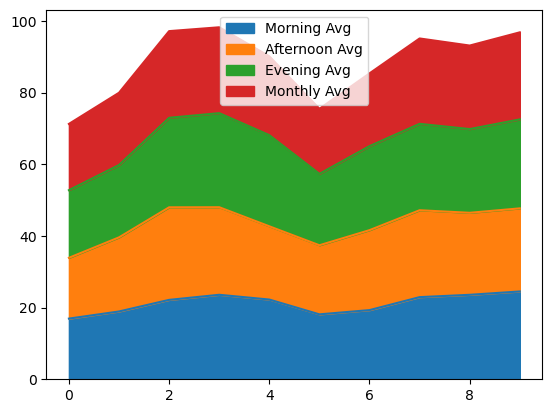

In [7]:
df.plot(kind = 'area')

## corrrelation matrix 

In [9]:
data = pd.read_csv("churn.csv")
df = data.copy()
df.drop(['RowNumber', 'CustomerId','Surname' , 'NumOfProducts'] ,axis = 1 , inplace = True)
df['Gender'] = lb.fit_transform(df['Gender'])
df['Geography'] = lb.fit_transform(df['Geography'])
Y = (df.pop('Exited').to_numpy())
X = scaler.fit_transform(pd.get_dummies(df.copy()).to_numpy())

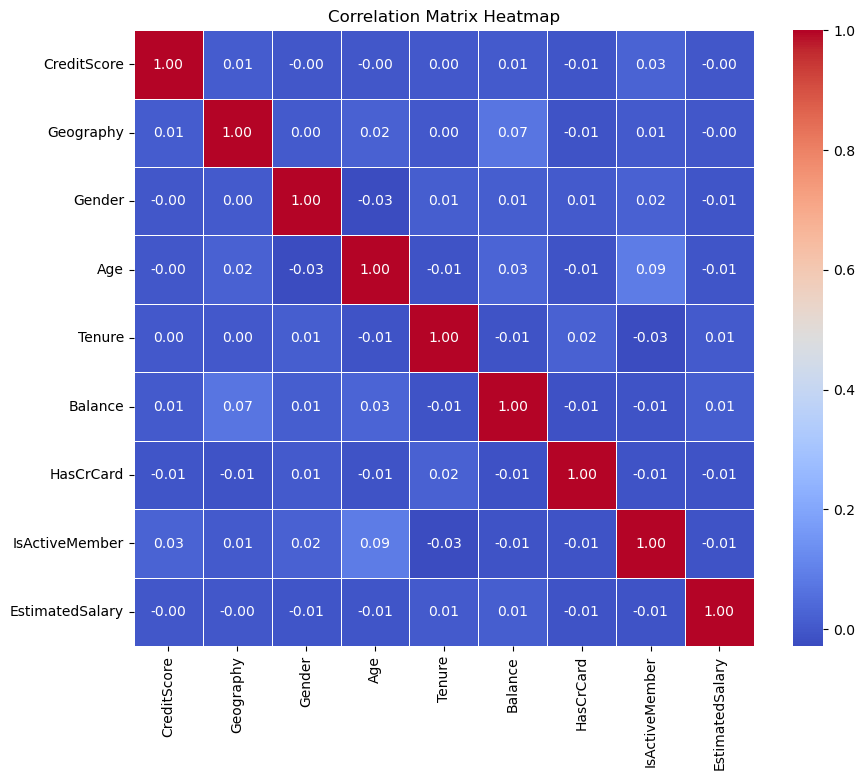

In [10]:
correlation_matrix = df.corr()
# Create a heatmap
plt.figure(figsize=(10, 8))
k = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()